This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Working with Keras: A deep dive

## A spectrum of workflows

## Different ways to build Keras models

### The Sequential model

**The `Sequential` class**

In [1]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="softmax")
])

**Incrementally building a Sequential model**

In [2]:
model = keras.Sequential()
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))

**Calling a model for the first time to build it**

In [3]:
model.build(input_shape=(None, 3))
model.weights

[<tf.Variable 'dense_2/kernel:0' shape=(3, 64) dtype=float32, numpy=
 array([[ 3.85455191e-02,  1.01517320e-01,  1.78936779e-01,
          1.71656638e-01,  1.30338848e-01,  2.05118537e-01,
          1.60747051e-01,  9.00534987e-02, -1.22430339e-01,
          5.28513193e-02,  3.12553942e-02,  1.04850769e-01,
         -2.01521456e-01, -6.25553727e-03,  1.62385166e-01,
         -7.28872418e-03, -1.13860369e-02,  1.13955408e-01,
          1.57792747e-01, -2.36082077e-03,  2.25011289e-01,
          1.06059015e-01, -2.09320083e-01, -1.49392605e-01,
         -9.71060991e-03,  2.60397196e-01,  2.03372359e-01,
          4.64791358e-02,  3.14296782e-02, -1.01652399e-01,
         -2.17098027e-01,  2.47323036e-01, -2.65851378e-01,
         -2.14303419e-01,  1.12864941e-01, -1.11290500e-01,
         -1.22611418e-01, -3.78476679e-02, -2.27905154e-01,
         -1.83839634e-01,  2.77278841e-01,  6.05922937e-02,
         -7.70886838e-02, -1.70063019e-01, -9.94040966e-02,
         -2.90204108e-01,  2.09

**The summary method**

In [4]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                256       
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


**Naming models and layers with the `name` argument**

In [5]:
model = keras.Sequential(name="my_example_model")
model.add(layers.Dense(64, activation="relu", name="my_first_layer"))
model.add(layers.Dense(10, activation="softmax", name="my_last_layer"))
model.build((None, 3))
model.summary()

Model: "my_example_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_first_layer (Dense)      (None, 64)                256       
                                                                 
 my_last_layer (Dense)       (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


**Specifying the input shape of your model in advance**

In [6]:
model = keras.Sequential()
model.add(keras.Input(shape=(3,)))
model.add(layers.Dense(64, activation="relu"))

In [7]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                256       
                                                                 
Total params: 256
Trainable params: 256
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.add(layers.Dense(10, activation="softmax"))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                256       
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


### The Functional API

#### A simple example

**A simple Functional model with two `Dense` layers**

In [9]:
inputs = keras.Input(shape=(3,), name="my_input")
features = layers.Dense(64, activation="relu")(inputs)
outputs = layers.Dense(10, activation="softmax")(features)
model = keras.Model(inputs=inputs, outputs=outputs)

In [10]:
inputs = keras.Input(shape=(3,), name="my_input")

In [11]:
inputs.shape

TensorShape([None, 3])

In [12]:
inputs.dtype

tf.float32

In [13]:
features = layers.Dense(64, activation="relu")(inputs)

In [14]:
features.shape

TensorShape([None, 64])

In [15]:
outputs = layers.Dense(10, activation="softmax")(features)
model = keras.Model(inputs=inputs, outputs=outputs)

In [16]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_input (InputLayer)       [(None, 3)]               0         
                                                                 
 dense_8 (Dense)             (None, 64)                256       
                                                                 
 dense_9 (Dense)             (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


#### Multi-input, multi-output models

**A multi-input, multi-output Functional model**

In [17]:
vocabulary_size = 10000
num_tags = 100
num_departments = 4

# 定义模型输入
title = keras.Input(shape=(vocabulary_size,), name="title")
text_body = keras.Input(shape=(vocabulary_size,), name="text_body")
tags = keras.Input(shape=(num_tags,), name="tags")

# 拼接成输入特征
features = layers.Concatenate()([title, text_body, tags])
features = layers.Dense(64, activation="relu")(features)

# 定义模型输出
priority = layers.Dense(1, activation="sigmoid", name="priority")(features)
department = layers.Dense(
    num_departments, activation="softmax", name="department")(features)

# 通过指定输入和输出创建模型
model = keras.Model(inputs=[title, text_body, tags], outputs=[priority, department])

#### Training a multi-input, multi-output model

**Training a model by providing lists of input & target arrays**

In [18]:
import numpy as np

num_samples = 1280

# 虚构输入数据
title_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
text_body_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
tags_data = np.random.randint(0, 2, size=(num_samples, num_tags))

# 虚构目标数据
priority_data = np.random.random(size=(num_samples, 1))
department_data = np.random.randint(0, 2, size=(num_samples, num_departments))

model.compile(optimizer="rmsprop",
              loss=["mean_squared_error", "categorical_crossentropy"],
              metrics=[["mean_absolute_error"], ["accuracy"]])
model.fit([title_data, text_body_data, tags_data],
          [priority_data, department_data],
          epochs=1)
model.evaluate([title_data, text_body_data, tags_data],
               [priority_data, department_data])
priority_preds, department_preds = model.predict([title_data, text_body_data, tags_data])

40/40 [==============================] - 0s 3ms/step


**Training a model by providing dicts of input & target arrays**

In [19]:
model.compile(optimizer="rmsprop",
              loss={"priority": "mean_squared_error", "department": "categorical_crossentropy"},
              metrics={"priority": ["mean_absolute_error"], "department": ["accuracy"]})
model.fit({"title": title_data, "text_body": text_body_data, "tags": tags_data},
          {"priority": priority_data, "department": department_data},
          epochs=1)
model.evaluate({"title": title_data, "text_body": text_body_data, "tags": tags_data},
               {"priority": priority_data, "department": department_data})
priority_preds, department_preds = model.predict(
    {"title": title_data, "text_body": text_body_data, "tags": tags_data})

40/40 [==============================] - 0s 2ms/step


#### The power of the Functional API: Access to layer connectivity

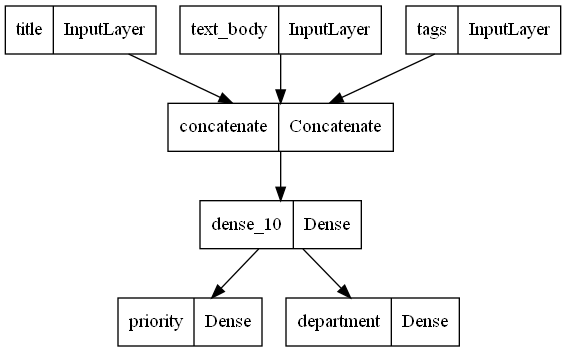

In [20]:
keras.utils.plot_model(model, "ticket_classifier.png")

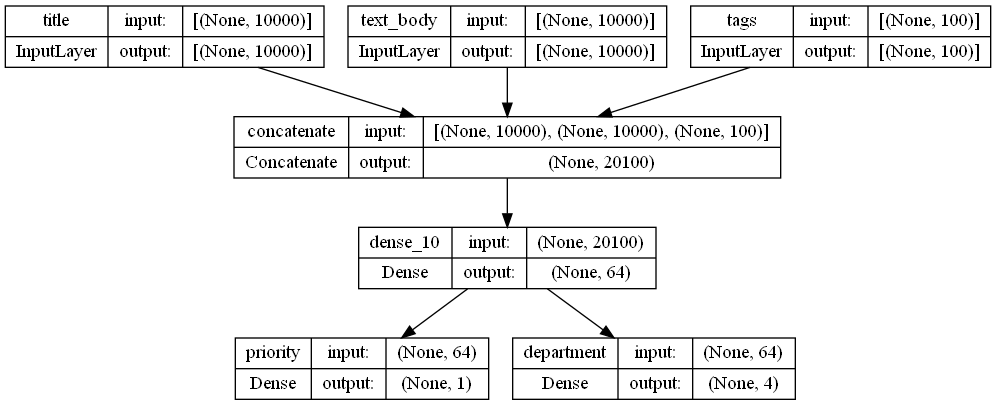

In [21]:
keras.utils.plot_model(model, "ticket_classifier_with_shape_info.png", show_shapes=True)

**Retrieving the inputs or outputs of a layer in a Functional model**

In [22]:
model.layers

In [23]:
model.layers[3].input

[<KerasTensor: shape=(None, 10000) dtype=float32 (created by layer 'title')>,
 <KerasTensor: shape=(None, 10000) dtype=float32 (created by layer 'text_body')>,
 <KerasTensor: shape=(None, 100) dtype=float32 (created by layer 'tags')>]

In [24]:
model.layers[3].output

<KerasTensor: shape=(None, 20100) dtype=float32 (created by layer 'concatenate')>

**Creating a new model by reusing intermediate layer outputs**

In [25]:
features = model.layers[4].output
difficulty = layers.Dense(3, activation="softmax", name="difficulty")(features)

new_model = keras.Model(
    inputs=[title, text_body, tags],
    outputs=[priority, department, difficulty])

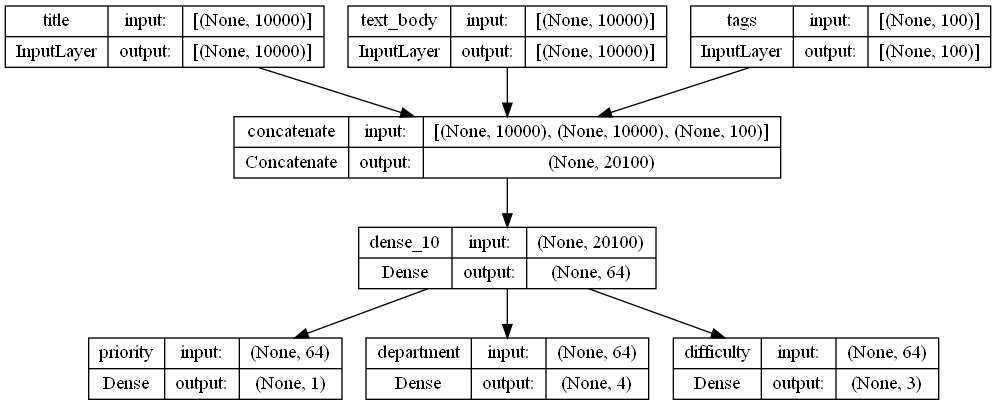

In [26]:
keras.utils.plot_model(new_model, "updated_ticket_classifier.png", show_shapes=True)

### Subclassing the Model class

#### Rewriting our previous example as a subclassed model

**A simple subclassed model**

In [27]:
class CustomerTicketModel(keras.Model):

    def __init__(self, num_departments):
        super().__init__()
        # 定义子层
        self.concat_layer = layers.Concatenate()
        self.mixing_layer = layers.Dense(64, activation="relu")
        self.priority_scorer = layers.Dense(1, activation="sigmoid")
        self.department_classifier = layers.Dense(
            num_departments, activation="softmax")

    def call(self, inputs):
        # 定义前向传播
        title = inputs["title"]
        text_body = inputs["text_body"]
        tags = inputs["tags"]

        features = self.concat_layer([title, text_body, tags])
        features = self.mixing_layer(features)
        priority = self.priority_scorer(features)
        department = self.department_classifier(features)
        return priority, department

In [28]:
model = CustomerTicketModel(num_departments=4)

priority, department = model(
    {"title": title_data, "text_body": text_body_data, "tags": tags_data})

In [29]:
# 参数loss和metrics的结构必须与call()返回的内容完全匹配
model.compile(optimizer="rmsprop",
              loss=["mean_squared_error", "categorical_crossentropy"],
              metrics=[["mean_absolute_error"], ["accuracy"]])
# 输入数据的结构必须与call()方法的输入完全匹配，目标数据的结构必须与call()方法返回的内容完全匹配
model.fit({"title": title_data,
           "text_body": text_body_data,
           "tags": tags_data},
          [priority_data, department_data],
          epochs=1)
model.evaluate({"title": title_data,
                "text_body": text_body_data,
                "tags": tags_data},
               [priority_data, department_data])
priority_preds, department_preds = model.predict({"title": title_data,
                                                  "text_body": text_body_data,
                                                  "tags": tags_data})

40/40 [==============================] - 0s 3ms/step


#### Beware: What subclassed models don't support

### Mixing and matching different components

**Creating a Functional model that includes a subclassed model**

In [30]:
class Classifier(keras.Model):

    def __init__(self, num_classes=2):
        super().__init__()
        if num_classes == 2:
            num_units = 1
            activation = "sigmoid"
        else:
            num_units = num_classes
            activation = "softmax"
        self.dense = layers.Dense(num_units, activation=activation)

    def call(self, inputs):
        return self.dense(inputs)

inputs = keras.Input(shape=(3,))
features = layers.Dense(64, activation="relu")(inputs)
outputs = Classifier(num_classes=10)(features)
model = keras.Model(inputs=inputs, outputs=outputs)

**Creating a subclassed model that includes a Functional model**

In [31]:
inputs = keras.Input(shape=(64,))
outputs = layers.Dense(1, activation="sigmoid")(inputs)
binary_classifier = keras.Model(inputs=inputs, outputs=outputs)

class MyModel(keras.Model):

    def __init__(self, num_classes=2):
        super().__init__()
        self.dense = layers.Dense(64, activation="relu")
        self.classifier = binary_classifier

    def call(self, inputs):
        features = self.dense(inputs)
        return self.classifier(features)

model = MyModel()

### Remember: Use the right tool for the job

## Using built-in training and evaluation loops

**The standard workflow: `compile()`, `fit()`, `evaluate()`, `predict()`**

In [32]:
from tensorflow.keras.datasets import mnist

def get_mnist_model():
    inputs = keras.Input(shape=(28 * 28,))
    features = layers.Dense(512, activation="relu")(inputs)
    features = layers.Dropout(0.5)(features)
    outputs = layers.Dense(10, activation="softmax")(features)
    model = keras.Model(inputs, outputs)
    return model

# 加载数据
(images, labels), (test_images, test_labels) = mnist.load_data()
images = images.reshape((60000, 28 * 28)).astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28)).astype("float32") / 255
train_images, val_images = images[10000:], images[:10000]
train_labels, val_labels = labels[10000:], labels[:10000]

model = get_mnist_model()
# 编译模型
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
# 训练模型
model.fit(train_images, train_labels,
          epochs=3,
          validation_data=(val_images, val_labels))
# 计算模型在新数据上的损失和指标
test_metrics = model.evaluate(test_images, test_labels)
# 计算模型在新数据上的分类概率
predictions = model.predict(test_images)

Epoch 1/3
1563/1563 [==============================] - 7s 4ms/step - loss: 0.2956 - accuracy: 0.9120 - val_loss: 0.1500 - val_accuracy: 0.9568
Epoch 2/3
1563/1563 [==============================] - 7s 4ms/step - loss: 0.1667 - accuracy: 0.9532 - val_loss: 0.1309 - val_accuracy: 0.9652
Epoch 3/3
313/313 [==============================] - 0s 778us/step


### Writing your own metrics

**Implementing a custom metric by subclassing the `Metric` class**

In [33]:
import tensorflow as tf

class RootMeanSquaredError(keras.metrics.Metric):

    def __init__(self, name="rmse", **kwargs):
        super().__init__(name=name, **kwargs)
        self.mse_sum = self.add_weight(name="mse_sum", initializer="zeros")
        self.total_samples = self.add_weight(
            name="total_samples", initializer="zeros", dtype="int32")

    def update_state(self, y_true, y_pred, sample_weight=None):
        # 实现状态更新逻辑，y_true是一个数据批量对应的目标（或标签）
        # y_pred是相应的模型预测值
        y_true = tf.one_hot(y_true, depth=tf.shape(y_pred)[1])
        mse = tf.reduce_sum(tf.square(y_true - y_pred))
        self.mse_sum.assign_add(mse)
        num_samples = tf.shape(y_pred)[0]
        self.total_samples.assign_add(num_samples)

    def result(self):
        # 指标的当前值
        return tf.sqrt(self.mse_sum / tf.cast(self.total_samples, tf.float32))

    def reset_state(self):
        # 重置指标状态
        self.mse_sum.assign(0.)
        self.total_samples.assign(0)

In [34]:
model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy", RootMeanSquaredError()])
model.fit(train_images, train_labels,
          epochs=3,
          validation_data=(val_images, val_labels))
test_metrics = model.evaluate(test_images, test_labels)

Epoch 1/3
1563/1563 [==============================] - 8s 5ms/step - loss: 0.2928 - accuracy: 0.9136 - rmse: 7.1842 - val_loss: 0.1528 - val_accuracy: 0.9570 - val_rmse: 7.3620
Epoch 2/3
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1664 - accuracy: 0.9537 - rmse: 7.3560 - val_loss: 0.1205 - val_accuracy: 0.9680 - val_rmse: 7.4069
Epoch 3/3
313/313 [==============================] - 1s 2ms/step - loss: 0.1106 - accuracy: 0.9718 - rmse: 7.4395


### Using callbacks

#### The EarlyStopping and ModelCheckpoint callbacks

**Using the `callbacks` argument in the `fit()` method**

In [35]:
# 如果精度在两轮内都不再改善，则中断训练
# 在每轮过后，都保存当前权重
callbacks_list = [
    keras.callbacks.EarlyStopping(
        monitor="val_accuracy",
        patience=2,
    ),
    keras.callbacks.ModelCheckpoint(
        filepath="checkpoint_path.keras",
        monitor="val_loss",
        save_best_only=True,
    )
]
model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          callbacks=callbacks_list,
          validation_data=(val_images, val_labels))

Epoch 1/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.2942 - accuracy: 0.9128 - val_loss: 0.1551 - val_accuracy: 0.9549
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1685 - accuracy: 0.9527 - val_loss: 0.1220 - val_accuracy: 0.9675
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1398 - accuracy: 0.9621 - val_loss: 0.1261 - val_accuracy: 0.9695
Epoch 4/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.1240 - accuracy: 0.9685 - val_loss: 0.1091 - val_accuracy: 0.9730
Epoch 5/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.1183 - accuracy: 0.9712 - val_loss: 0.1109 - val_accuracy: 0.9735
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.1128 - accuracy: 0.9724 - val_loss: 0.1103 - val_accuracy: 0.9761
Epoch 7/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.1064 - accuracy: 0.9744 - val_loss: 0.1167 - val_accuracy:

In [36]:
model = keras.models.load_model("checkpoint_path.keras")

### Writing your own callbacks

**Creating a custom callback by subclassing the `Callback` class**

In [37]:
from matplotlib import pyplot as plt

class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs):
        self.per_batch_losses = []

    def on_batch_end(self, batch, logs):
        self.per_batch_losses.append(logs.get("loss"))

    def on_epoch_end(self, epoch, logs):
        plt.clf()
        plt.plot(range(len(self.per_batch_losses)), self.per_batch_losses,
                 label="Training loss for each batch")
        plt.xlabel(f"Batch (epoch {epoch})")
        plt.ylabel("Loss")
        plt.legend()
        plt.savefig(f"plot_at_epoch_{epoch}")
        self.per_batch_losses = []

Epoch 1/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.2935 - accuracy: 0.9139 - val_loss: 0.1635 - val_accuracy: 0.9540
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1659 - accuracy: 0.9532 - val_loss: 0.1232 - val_accuracy: 0.9667
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1414 - accuracy: 0.9636 - val_loss: 0.1124 - val_accuracy: 0.9729
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1258 - accuracy: 0.9676 - val_loss: 0.1058 - val_accuracy: 0.9744
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1141 - accuracy: 0.9707 - val_loss: 0.1120 - val_accuracy: 0.9739
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1082 - accuracy: 0.9739 - val_loss: 0.1069 - val_accuracy: 0.9771
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1087 - accuracy: 0.9747 - val_loss: 0.1125 - val_accuracy:

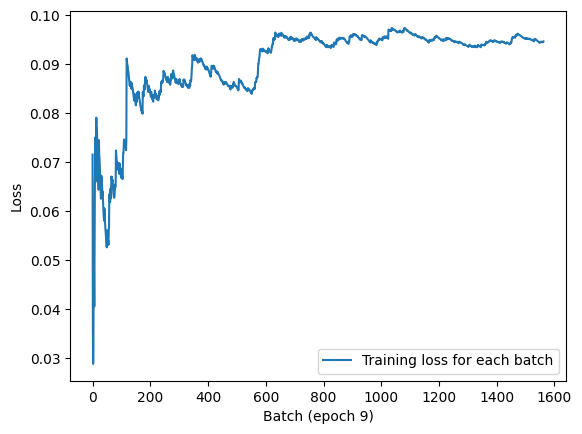

In [38]:
model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          callbacks=[LossHistory()],
          validation_data=(val_images, val_labels))

### Monitoring and visualization with TensorBoard

In [39]:
model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

tensorboard = keras.callbacks.TensorBoard(
    log_dir="/full_path_to_your_log_dir",
)
model.fit(train_images, train_labels,
          epochs=10,
          validation_data=(val_images, val_labels),
          callbacks=[tensorboard])

Epoch 1/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.2971 - accuracy: 0.9129 - val_loss: 0.1511 - val_accuracy: 0.9573
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1661 - accuracy: 0.9527 - val_loss: 0.1253 - val_accuracy: 0.9657
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1375 - accuracy: 0.9627 - val_loss: 0.1122 - val_accuracy: 0.9709
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1255 - accuracy: 0.9671 - val_loss: 0.1082 - val_accuracy: 0.9728
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1181 - accuracy: 0.9699 - val_loss: 0.1135 - val_accuracy: 0.9732
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1087 - accuracy: 0.9734 - val_loss: 0.1077 - val_accuracy: 0.9752
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1049 - accuracy: 0.9756 - val_loss: 0.1045 - val_accuracy:

In [40]:
%load_ext tensorboard
%tensorboard --logdir /full_path_to_your_log_dir

## Writing your own training and evaluation loops

### Training versus inference

### Low-level usage of metrics

In [41]:
metric = keras.metrics.SparseCategoricalAccuracy()
targets = [0, 1, 2]
predictions = [[1, 0, 0], [0, 1, 0], [0, 0, 1]]
metric.update_state(targets, predictions)
current_result = metric.result()
print(f"result: {current_result:.2f}")

result: 1.00


In [42]:
values = [0, 1, 2, 3, 4]
mean_tracker = keras.metrics.Mean()
for value in values:
    mean_tracker.update_state(value)
print(f"Mean of values: {mean_tracker.result():.2f}")

Mean of values: 2.00


### A complete training and evaluation loop

**Writing a step-by-step training loop: the training step function**

In [43]:
model = get_mnist_model()

# 损失函数
loss_fn = keras.losses.SparseCategoricalCrossentropy()
# 优化器
optimizer = keras.optimizers.RMSprop()
# 需要监控的指标列表
metrics = [keras.metrics.SparseCategoricalAccuracy()]
# Mean指标跟踪器来跟踪损失均值
loss_tracking_metric = keras.metrics.Mean()

def train_step(inputs, targets):
    # 运行前向传播
    with tf.GradientTape() as tape:
        predictions = model(inputs, training=True)
        loss = loss_fn(targets, predictions)
    # 运行反向传播    
    gradients = tape.gradient(loss, model.trainable_weights)
    optimizer.apply_gradients(zip(gradients, model.trainable_weights))
    
    # 跟踪指标
    logs = {}
    for metric in metrics:
        metric.update_state(targets, predictions)
        logs[metric.name] = metric.result()
    
    # 跟踪损失均值
    loss_tracking_metric.update_state(loss)
    logs["loss"] = loss_tracking_metric.result()
    return logs

**Writing a step-by-step training loop: resetting the metrics**

In [44]:
def reset_metrics():
    for metric in metrics:
        metric.reset_state()
    loss_tracking_metric.reset_state()

**Writing a step-by-step training loop: the loop itself**

In [45]:
training_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
training_dataset = training_dataset.batch(32)
epochs = 3
for epoch in range(epochs):
    reset_metrics()
    for inputs_batch, targets_batch in training_dataset:
        logs = train_step(inputs_batch, targets_batch)
    print(f"Results at the end of epoch {epoch}")
    for key, value in logs.items():
        print(f"...{key}: {value:.4f}")

Results at the end of epoch 0
...sparse_categorical_accuracy: 0.9138
...loss: 0.2901
Results at the end of epoch 1
...sparse_categorical_accuracy: 0.9529
...loss: 0.1653
Results at the end of epoch 2
...sparse_categorical_accuracy: 0.9633
...loss: 0.1405


**Writing a step-by-step evaluation loop**

In [46]:
def test_step(inputs, targets):
    predictions = model(inputs, training=False)
    loss = loss_fn(targets, predictions)

    logs = {}
    for metric in metrics:
        metric.update_state(targets, predictions)
        logs["val_" + metric.name] = metric.result()

    loss_tracking_metric.update_state(loss)
    logs["val_loss"] = loss_tracking_metric.result()
    return logs

val_dataset = tf.data.Dataset.from_tensor_slices((val_images, val_labels))
val_dataset = val_dataset.batch(32)
reset_metrics()
for inputs_batch, targets_batch in val_dataset:
    logs = test_step(inputs_batch, targets_batch)
print("Evaluation results:")
for key, value in logs.items():
    print(f"...{key}: {value:.4f}")

Evaluation results:
...val_sparse_categorical_accuracy: 0.9681
...val_loss: 0.1271


### Make it fast with tf.function

**Adding a `tf.function` decorator to our evaluation-step function**

In [47]:
@tf.function
def test_step(inputs, targets):
    predictions = model(inputs, training=False)
    loss = loss_fn(targets, predictions)

    logs = {}
    for metric in metrics:
        metric.update_state(targets, predictions)
        logs["val_" + metric.name] = metric.result()

    loss_tracking_metric.update_state(loss)
    logs["val_loss"] = loss_tracking_metric.result()
    return logs

val_dataset = tf.data.Dataset.from_tensor_slices((val_images, val_labels))
val_dataset = val_dataset.batch(32)
reset_metrics()
for inputs_batch, targets_batch in val_dataset:
    logs = test_step(inputs_batch, targets_batch)
print("Evaluation results:")
for key, value in logs.items():
    print(f"...{key}: {value:.4f}")

Evaluation results:
...val_sparse_categorical_accuracy: 0.9681
...val_loss: 0.1271


### Leveraging fit() with a custom training loop

**Implementing a custom training step to use with `fit()`**

In [48]:
loss_fn = keras.losses.SparseCategoricalCrossentropy()
loss_tracker = keras.metrics.Mean(name="loss")

class CustomModel(keras.Model):
    # 自定义训练循环，无需使用@tf.function
    def train_step(self, data):
        inputs, targets = data
        with tf.GradientTape() as tape:
            predictions = self(inputs, training=True)
            loss = loss_fn(targets, predictions)
        gradients = tape.gradient(loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(gradients, self.trainable_weights))

        loss_tracker.update_state(loss)
        return {"loss": loss_tracker.result()}
    
    # 跟踪模型的Metric实例
    @property
    def metrics(self):
        return [loss_tracker]

In [49]:
inputs = keras.Input(shape=(28 * 28,))
features = layers.Dense(512, activation="relu")(inputs)
features = layers.Dropout(0.5)(features)
outputs = layers.Dense(10, activation="softmax")(features)
model = CustomModel(inputs, outputs)

model.compile(optimizer=keras.optimizers.RMSprop())
model.fit(train_images, train_labels, epochs=3)

Epoch 1/3
1563/1563 [==============================] - 6s 4ms/step - loss: 0.2928
Epoch 2/3
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1659
Epoch 3/3
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1377


In [50]:
class CustomModel(keras.Model):
    def train_step(self, data):
        inputs, targets = data
        with tf.GradientTape() as tape:
            predictions = self(inputs, training=True)
            # 利用compiled_loss方法计算损失
            loss = self.compiled_loss(targets, predictions)
        gradients = tape.gradient(loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(gradients, self.trainable_weights))
        # 更新模型指标
        self.compiled_metrics.update_state(targets, predictions)
        return {m.name: m.result() for m in self.metrics}

In [51]:
inputs = keras.Input(shape=(28 * 28,))
features = layers.Dense(512, activation="relu")(inputs)
features = layers.Dropout(0.5)(features)
outputs = layers.Dense(10, activation="softmax")(features)
model = CustomModel(inputs, outputs)

model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=[keras.metrics.SparseCategoricalAccuracy()])
model.fit(train_images, train_labels, epochs=3)

Epoch 1/3
1563/1563 [==============================] - 7s 5ms/step - loss: 0.2930 - sparse_categorical_accuracy: 0.9138
Epoch 2/3
1563/1563 [==============================] - 7s 4ms/step - loss: 0.1690 - sparse_categorical_accuracy: 0.9522
Epoch 3/3
1563/1563 [==============================] - 7s 4ms/step - loss: 0.1384 - sparse_categorical_accuracy: 0.9629


## Summary